In [1]:
import pandas as pd
import seaborn as sns

insurance = pd.read_csv('insurance.csv')

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Underweight: BMI is less than 18.5 
Healthy: BMI is between 18.5 and 24.9 
Overweight: BMI is between 25 and 29.9 
Obese: BMI is between 30 and 39.9 
Severely obese: BMI is 40 or higher 

# Bin the bmi column

In [3]:
pd.cut(insurance.bmi, bins=[0,18.5,24.9,29.9,39.9, float('inf')],
       labels=['Underweight','Healthy','Overweight','Obese','Severely obese'])

0       Overweight
1            Obese
2            Obese
3          Healthy
4       Overweight
           ...    
1333         Obese
1334         Obese
1335         Obese
1336    Overweight
1337    Overweight
Name: bmi, Length: 1338, dtype: category
Categories (5, object): ['Underweight' < 'Healthy' < 'Overweight' < 'Obese' < 'Severely obese']

In [4]:
insurance['BMI Category'] = pd.cut(insurance.bmi, bins=[0,18.5,24.9,29.9,39.9, float('inf')],
       labels=['Underweight','Healthy','Overweight','Obese','Severely obese'])

insurance.head()

,age,sex,bmi,children,smoker,region,charges,BMI Category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


# How are the charges related to the bmi?

Text(0.5, 1.0, 'BMI vs Insurance Charges')

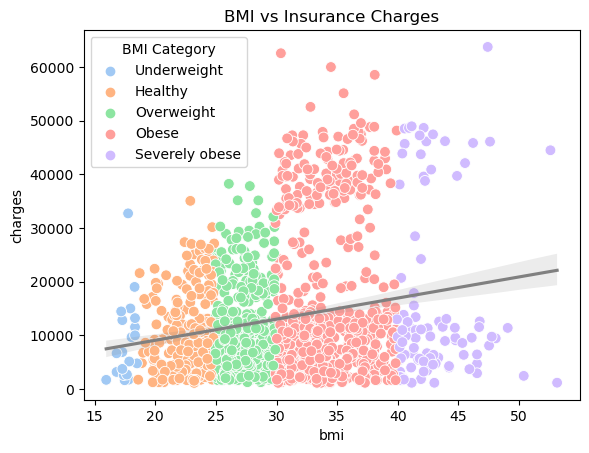

In [5]:
ax = sns.scatterplot(x='bmi', y='charges', hue='BMI Category', data=insurance, palette='pastel', s=60)
sns.regplot(x='bmi', y='charges', data=insurance, scatter=False, color='gray')

ax.set_title('BMI vs Insurance Charges')

### As BMI increases, insurance charges generally tend to increase, particularly for individuals categorized as obese or severely obese.

# How is the smoker status related to the charges?

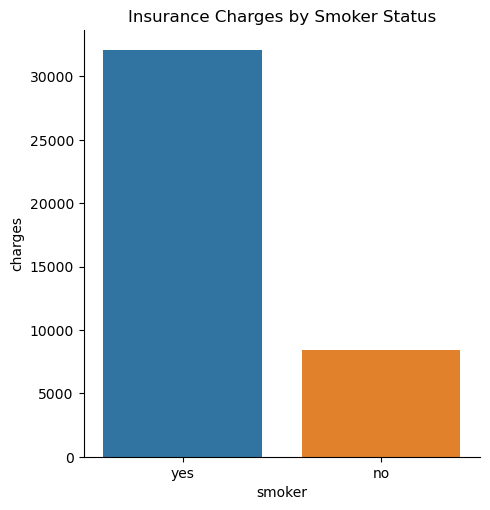

In [8]:
g = sns.catplot(kind='bar',x='smoker', y='charges', data=insurance, errorbar=None)

for ax in g.axes.flat: 
    ax.set_title('Insurance Charges by Smoker Status')

 ### insurance charges are significantly higher for smokers compared to non-smokers.

# How are the charges related to the region?

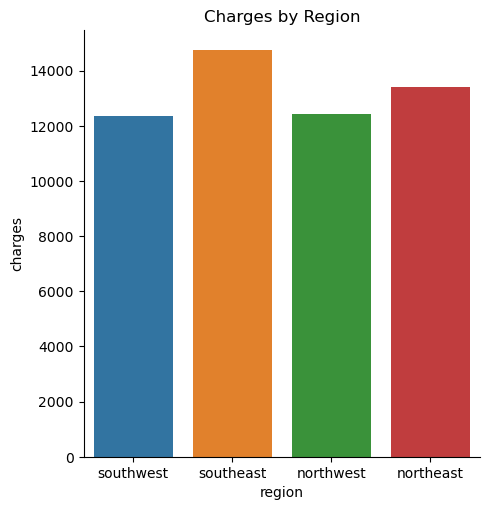

In [9]:
g = sns.catplot(kind='bar',x='region', y='charges', data=insurance, errorbar=None)

for ax in g.axes.flat: 
    ax.set_title('Charges by Region')

### Insurance charges vary by region, with the Southeast region having the highest average charges, followed by the Northeast, Northwest, and Southwest regions.

# Which region has the highest obesity percentage? 
(Calculate obesity percentage within each region and compare.)

Underweight: BMI is less than 18.5 
Healthy: BMI is between 18.5 and 24.9 
Overweight: BMI is between 25 and 29.9 
Obese: BMI is between 30 and 39.9 
Severely obese: BMI is 40 or higher 

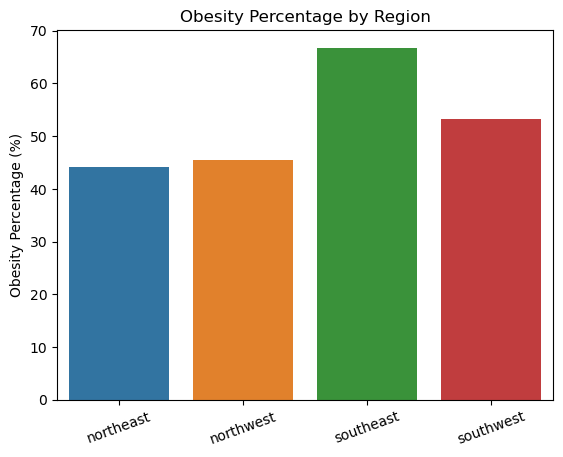

In [10]:
insurance['is_obese'] = insurance['bmi'] >= 30

obesity_percentage = insurance.groupby('region')['is_obese'].mean() * 100

obesity_percentage = obesity_percentage.reset_index()

ax = sns.barplot(x='region', y='is_obese', data=obesity_percentage)

ax.set_ylabel('Obesity Percentage (%)')
ax.set_title('Obesity Percentage by Region')
ax.set_xlabel('')
ax.tick_params('x', labelrotation=20)

In [11]:
obesity_percentage

,region,is_obese
0,northeast,44.135802
1,northwest,45.538462
2,southeast,66.758242
3,southwest,53.230769
